# Proyecto Final Fundamentos de Aprendizaje Automático.

## 1. Introducción

### 1.a- Presentación del problema:

En este Jupyter Notebook, se aborda la resolución de un problema de clasificación de imágenes para la detección del virus COVID-19. El COVID-19 es un virus que ha mantenido al mundo en alerta durante un período prolongado debido a su alta capacidad de contagio y la gravedad de sus consecuencias. La detección de la presencia del virus en el organismo humano no ha sido una tarea sencilla, ya que los métodos tradicionales, como los test de antígenos, generan una gran cantidad de residuos y su fiabilidad no siempre es la más alta.

Una de las complicaciones más serias asociadas al COVID-19 es que algunas personas desarrollan neumonía como consecuencia de la infección. La detección temprana y precisa de esta neumonía es muy importante para el tratamiento adecuado de los pacientes. En este contexto, el uso de imágenes de rayos X de tórax se ha convertido en una herramienta valiosa para el diagnóstico.

El objetivo de este proyecto es clasificar imágenes de rayos X de tórax para detectar la presencia de neumonía y, específicamente, determinar si es causada por COVID-19. Utilizaremos un conjunto de datos de código abierto compuesto por imágenes etiquetadas en tres categorías:

1. COVID-19: El paciente de la imagen presenta neumonía debido a la infección por COVID-19.
2. Normal: El paciente de la imagen no presenta neumonía.
3. Pneumonía: El paciente presenta neumonía, pero no es causada por COVID-19.

Para lograr esta clasificación, se aplicarán técnicas de aprendizaje automático, aprovechando la disponibilidad de los datos y la capacidad de procesamiento de dichas imágenes. Con este enfoque es posible mejorar la detección del COVID-19 y que también podría reducir la dependencia de métodos de prueba más invasivos, optimizando así los recursos sanitarios y mejorando los tiempos de respuesta en el diagnóstico.

### 1.b- Obtención de los datos:

Los datos han sido obtenidos de repositorios de datos destinados para trabajos de investigación y académicos. Se dejan disponibles los hipervínculos a las direcciones webs de donde fueron extraídos:

1. [Kaggle-Data-1]
2. [Mendeley-Data]
3. [Kaggle-Data-2]

Los datos en general vienen clasificados según las categorías mencionadas en la sección anterior. A su vez, en los datos de Kaggle, vienen separados en carpetas de `test` y `train`. Las imágenes tienen dimensiones diferentes entre sí, incluso diferente relación de aspecto entre ellas. Este es un aspecto que será tratado al comienzo del procesamiento de los datos.

[Kaggle-Data-1]: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
[Mendeley-Data]: https://data.mendeley.com/datasets/dvntn9yhd2/1
[Kaggle-Data-2]: https://www.kaggle.com/datasets/prashant268/chest-xray-covid19-pneumonia


### 1.c- Hardware para la resolución del problema:

Para la resolución del problema se utilizará una laptop para las operaciones que no sean muy costosas computacionalmente. Adicionalmente, a la hora de entrenar modelos que son paralelizables, como ConvNets, se analiza la posibilidad de utilizar la plataforma de `GoogleColab` ya que tiene optimizado la paralelización de este tipo de redes, utilizando GPUs.

## 2. EDA (Análisis Exploratorio de Datos)

### 2.a- Procesamiento de las imágenes:

#### 2.a.1- Cantidad de imagenes por datasets

In [1]:
import os

In [2]:
# Obtener el directorio actual del notebook
notebook_dir = os.getcwd()

# Directorio donde están las carpetas dataset1, dataset2, dataset3
data_dir = os.path.join(notebook_dir, 'data')

# Lista de datasets (carpetas dataset1, dataset2, dataset3)
datasets = ['dataset1', 'dataset2', 'dataset3']

# Lista de categorías
categories = ['Covid', 'Normal', 'Pneumonia']

# Lista de fases de aprendizaje 
fases = ['train', 'test']

In [3]:
# Función para contar imágenes en un directorio específico
def count_images_in_directory(directory):
    count = 0
    if os.path.exists(directory):
        for filename in os.listdir(directory):
            if filename.endswith('.jpeg') or filename.endswith('.jpg') or filename.endswith('.png'):
                count += 1
    return count

# Contar imágenes en cada dataset y categoría
n_images = []
for dataset in datasets:
    dataset_dir = os.path.join(data_dir, dataset)
    print(f"Dataset: {dataset}")
    for fase in fases:
        fase_dir = os.path.join(dataset_dir, fase)
        print(f"Fase: {fase}")
        for category in categories:
            category_dir = os.path.join(fase_dir, category)
            num_images = count_images_in_directory(category_dir)
            print(f"Número de imágenes en la categoría {category}: {num_images}")
    print()

Dataset: dataset1
Fase: train
Número de imágenes en la categoría Covid: 111
Número de imágenes en la categoría Normal: 70
Número de imágenes en la categoría Pneumonia: 70
Fase: test
Número de imágenes en la categoría Covid: 26
Número de imágenes en la categoría Normal: 20
Número de imágenes en la categoría Pneumonia: 20

Dataset: dataset2
Fase: train
Número de imágenes en la categoría Covid: 1626
Número de imágenes en la categoría Normal: 1802
Número de imágenes en la categoría Pneumonia: 1800
Fase: test
Número de imágenes en la categoría Covid: 0
Número de imágenes en la categoría Normal: 0
Número de imágenes en la categoría Pneumonia: 0

Dataset: dataset3
Fase: train
Número de imágenes en la categoría Covid: 460
Número de imágenes en la categoría Normal: 1266
Número de imágenes en la categoría Pneumonia: 3418
Fase: test
Número de imágenes en la categoría Covid: 116
Número de imágenes en la categoría Normal: 317
Número de imágenes en la categoría Pneumonia: 855





Las cantidad de imágenes con las que se cuenta, tomando como fuente los datasets mencionados arriba, se encuentra resumido en la siguiente tabla.

<div align="center">
        
| DataSet  | Covid | Normal | Neumonía |
|----------|-------|--------|----------|
| Kaggle-1 |137|90|90|
| Mendeley |1626|1802|1800|
| Kaggle-2 |576|1583|4273|
| Total    |2334|3475|6163|

</div>


#### 2.a.2- Preprocesado de las imagenes 


En particular lo que se realiza es un preprocesado de las imágenes, llevandolas a el mismo tamaño para todas: cuadradas de lado `SIZE`. En principio, se elige `SIZE` = 256, aunque esto podría ser modificado más adelante.

Las imágenes preprocesadas, tanto de `train` como `test`, se encuentran en el directorio `...data\preprocess_data\`, donde allí se encuentran las tres categorías:

- `Covid\` (2334 imágnes)
- `Normal\` (3475 imágenes)
- `Pneumonia\` (6163 imágnes)

In [4]:
import os
from tqdm import tqdm
from PIL import Image, ImageOps

In [5]:
SIZE = 256

In [6]:
# Directorios de base y de destino de las imágenes
base_dir = os.getcwd()
data_dir = os.path.join(base_dir, 'data')
output_dir = os.path.join(data_dir, 'processed_data')
categories = ['Covid', 'Normal', 'Pneumonia']
target_size = (SIZE, SIZE)

# Crear directorios de salida
for category in categories:
    os.makedirs(os.path.join(output_dir, category))

def preprocess_and_save_images(source_dir, category, target_size):
    dest_path = os.path.join(output_dir, category)
    
    if not os.path.exists(source_dir):
        print(f"El directorio {source_dir} no existe. Saltando.")
        return
    
    for img_name in tqdm(os.listdir(source_dir)):
        try:
            img_path = os.path.join(source_dir, img_name)
            img = Image.open(img_path).convert('RGB')

            img = ImageOps.fit(img, target_size)
            
            img.save(os.path.join(dest_path, img_name))
        except Exception as e:
            print(f"Error procesando {img_path}: {e}")

def process_dataset(dataset_dir, target_size):
    for category in tqdm(categories, desc=f"Procesando {dataset_dir}"):
        # Procesar imágenes de train si existen
        train_dir = os.path.join(dataset_dir, 'train', category)
        if os.path.exists(train_dir):
            preprocess_and_save_images(train_dir, category, target_size)
        else:
            print(f"El directorio {train_dir} no existe. Saltando.")

        # Procesar imágenes de test si existen
        test_dir = os.path.join(dataset_dir, 'test', category)
        if os.path.exists(test_dir):
            preprocess_and_save_images(test_dir, category, target_size)
        else:
            print(f"El directorio {test_dir} no existe. Saltando.")

# Procesar todos los datasets
for dataset in ['dataset1', 'dataset2', 'dataset3']:
    dataset_dir = os.path.join(data_dir, dataset)
    process_dataset(dataset_dir, target_size)

Procesando c:\machine_learning\MLF_FinalProject\data\dataset1:   0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<00:00, 35.33it/s]
Procesando c:\machine_learning\MLF_FinalProject\data\dataset1: 100%|██████████| 3/3 [00:20<00:00,  6.88s/it]
100%|██████████| 1626/1626 [00:43<00:00, 37.11it/s]a\dataset2:   0%|          | 0/3 [00:00<?, ?it/s]
Procesando c:\machine_learning\MLF_FinalProject\data\dataset2:  33%|███▎      | 1/3 [00:43<01:27, 43.83s/it]

El directorio c:\machine_learning\MLF_FinalProject\data\dataset2\test\Covid no existe. Saltando.


100%|██████████| 1802/1802 [00:54<00:00, 33.07it/s]
Procesando c:\machine_learning\MLF_FinalProject\data\dataset2:  67%|██████▋   | 2/3 [01:38<00:50, 50.11s/it]

El directorio c:\machine_learning\MLF_FinalProject\data\dataset2\test\Normal no existe. Saltando.


100%|██████████| 1800/1800 [00:54<00:00, 32.93it/s]
Procesando c:\machine_learning\MLF_FinalProject\data\dataset2: 100%|██████████| 3/3 [02:33<00:00, 51.01s/it]


El directorio c:\machine_learning\MLF_FinalProject\data\dataset2\test\Pneumonia no existe. Saltando.


100%|██████████| 855/855 [00:25<00:00, 33.60it/s]
Procesando c:\machine_learning\MLF_FinalProject\data\dataset3: 100%|██████████| 3/3 [04:52<00:00, 97.45s/it] 

Preprocesamiento completo.


Verifiquemos que todas las imagenes tengan todas el mismo tamaño

In [10]:
# Configuramos los directorios
processed_data_dir = os.path.join(os.getcwd(), 'data', 'processed_data')
categories = ['Covid', 'Normal', 'Pneumonia']
numImages = [0, 0, 0]

def check_image_sizes(dataset_dir):
    for i, category in enumerate(categories):
        # Para cada categoría, definimos el directorio
        category_dir = os.path.join(dataset_dir, category)
        for img_name in tqdm(os.listdir(category_dir)):
            img_path = os.path.join(category_dir, img_name)
            img = Image.open(img_path)
            if img.size != (SIZE, SIZE):
                # Si el tamaño de la imagen no es el esperado, cortamos la función.
                print(f"La imagen {img_path} tiene un tamaño diferente al esperado.")
                return
            else:
                numImages[i] += 1

    print(f"Todas las imágenes en {dataset_dir} tienen el tamaño esperado.")
    print(f"Número de imágenes en {dataset_dir}: {numImages}")
    return

check_image_sizes(processed_data_dir)

  0%|          | 0/2334 [00:00<?, ?it/s]

100%|██████████| 6163/6163 [00:52<00:00, 117.35it/s]

Todas las imágenes en c:\machine_learning\MLF_FinalProject\data\processed_data tienen el tamaño esperado.
Número de imágenes en c:\machine_learning\MLF_FinalProject\data\processed_data: [2334, 3475, 6163]


### 2.b- Análisis de los datos:

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [12]:
# Una configuración fancy 
sns.set(style="whitegrid")

# Directorios necesarios
notebook_dir = os.getcwd()
data_dir = os.path.join(notebook_dir, 'data', 'processed_data')
categories = ['Covid', 'Normal', 'Pneumonia']

#### 2.b.1 Número de imágenes por categoría

Cantidad de imágnes por categoría: 
Covid: 2334 imágenes
Normal: 3475 imágenes
Pneumonia: 6163 imágenes


c:\Users\Usuario\miniconda3\envs\machine_learning\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


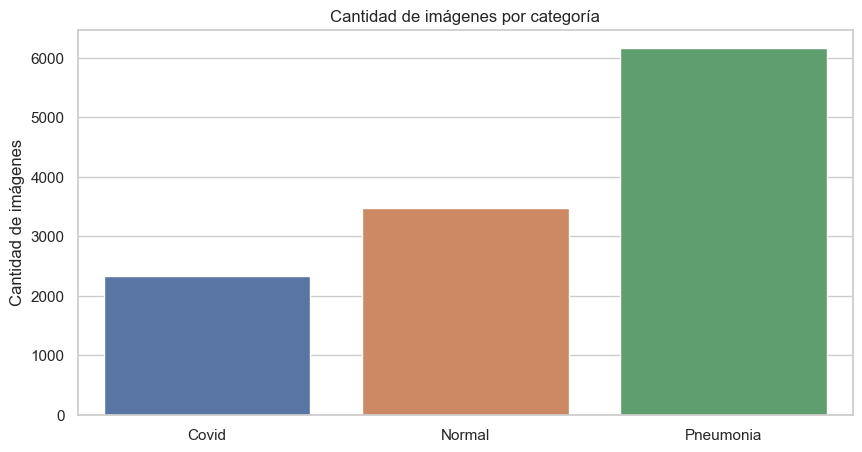

Proporciones de imágenes por categoría: 
Covid: 19.50%
Normal: 29.03%
Pneumonia: 51.48%


In [13]:
# Cramos un mapa por compresión 
image_counts = {category: len(os.listdir(os.path.join(data_dir, category))) for category in categories}
print("Cantidad de imágnes por categoría: ")
for category, count in image_counts.items():
    print(f"{category}: {count} imágenes")

# Gráfico de barras para visualizarlo
plt.figure(figsize=(10, 5))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()))
plt.title("Cantidad de imágenes por categoría")
plt.ylabel("Cantidad de imágenes")
plt.show()

# Proporciones de cada categoría
total_images = sum(image_counts.values())
proportions = {category: count / total_images for category, count in image_counts.items()}
print("Proporciones de imágenes por categoría: ")
for category, proportion in proportions.items():
    print(f"{category}: {proportion:.2%}")

Nos gustaría que las proporciones de las imágenes sea más pareja. Vivamos con esto por el momento y en el futuro veremos cómo lo solucionamos.

#### 2.b.2- Ejemplos de imágenes

Mostramos varias imágenes aleatorias de cada categoría.

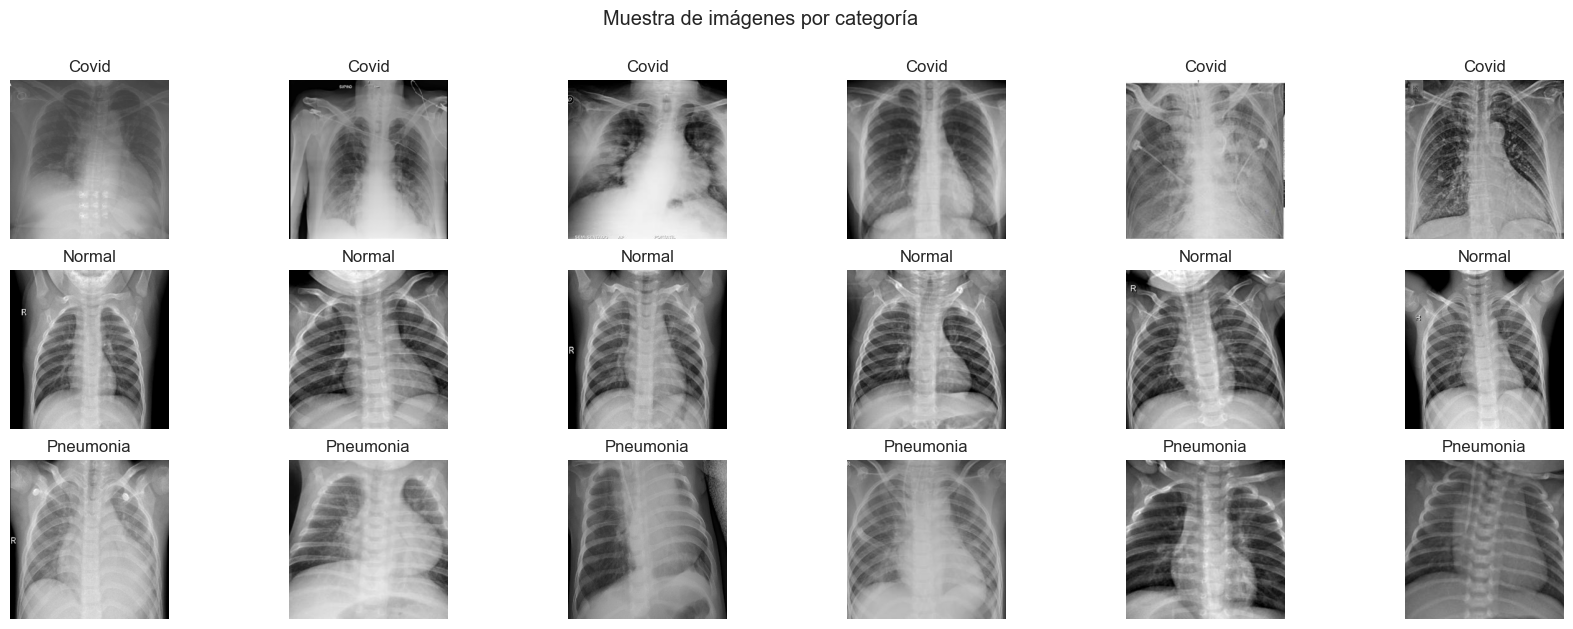

In [19]:
sample_size = 6
fig, axes = plt.subplots(len(categories), sample_size, figsize=(21, 7))
for i, category in enumerate(categories):
    category_dir = os.path.join(data_dir, category)
    #Seleccionamos al azar sample_size imagenes del directorio.
    sample_images = np.random.choice(os.listdir(category_dir), sample_size, replace = False)
    for j, image_name in enumerate(sample_images):
        image_path = os.path.join(category_dir, image_name)
        image = Image.open(image_path)
        axes[i, j].imshow(image, cmap='gray')
        axes[i, j].axis('off')
        axes[i, j].set_title(category)
plt.suptitle('Muestra de imágenes por categoría')
plt.show()
plt.show()

Obsevacion: Luego de haber corrido de manera repetitiva el código de arriba, una cosa a notar es que en muchas de las imagenes de neumonía por covid, se observan cables conectados a los pacientes, cosa que no ocurre en las otras dos categorías. Estimo que esto ocurre debido a que muchas imágenes de la categoría `Covid` han sido tomadas en situaciones donde el paciente se encuentra internado, y conectado a diferentes aparatos al mismo tiempo de la toma de la imagen.

## 3. Modelos y entrenamiento

### 3.a- Entrenamiento con modelos clásicos supervisados.
Vamos a trabajar, para la clasificación de imágenes, con la técnica Histograma de Gradientes Orientados (HOG). Esto lo debemos hacer debido a que como queremos clasificar imágenes, se deben extraer características de las mismas. 

Introducimos algo de contexto de este concepto.

#### 3.a.1- Concepto HOG:

Los HOG describen la distribución de las intensidades de gradientes o las direcciones de los bordes dentro de una imagen. En lugar de utilizar los valores de los píxeles, este método se centra en las variaciones y cambios de intensidad entre los píxeles, lo cual es muy informativo sobre la forma y el contorno de los objetos en la imagen. Se aplican a imágenes en escala de grises. 

Para cada píxel en la imagen.

##### 1. Cálculo del gradiente: 
Se calcula el gradiente en las direcciones $x$ e $y$, usando por ejemplo operadores de Sobel (u otro fitro de derivada). Esto produce dos matrices de gradiente $G_x$ y $G_y$:

$$
G_x = I * \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix},
$$

$$
G_y = I * \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix},
$$

donde

- $I$: Matrix de la imagen en escala de grises
- $G_x$ y $G_y$: Gradientes horizontales y verticales.

Se define la Magnitud $M$, 

$$
M_{ij} = \sqrt{G_{x, ij}^2 + G_{y, ij}^2},
$$
y la orientación $\theta$, 
$$
\theta_{ij} = \text{arctan}\left( \frac{G_{y, ij}}{G_{x, ij}} \right). 
$$

##### 2. División de la Imagen en Celdas:
La imagen se divide en pequeñas regiones llamadas celdas.

##### 3. Cálculo del Histograma de Gradientes:
Para cada celda, se construye un histograma de gradientes. El histograma cuenta el número de veces que el gradiente de un píxel tiene una orientación particular. La orientación del gradiente se agrupa en "bins" (por ejemplo, 9 bins que representan ángulos de 0 a 180 grados).

##### 4. Normalización de Bloques:
Para mejorar la invariancia a la iluminación y el contraste, se agrupan varias celdas en bloques superpuestos (por ejemplo, de 2x2 celdas). Los histogramas dentro de cada bloque se concatenan y luego se normalizan.

##### 5. Concatenación de Características:
Los histogramas normalizados de todos los bloques se concatenan para formar un vector de características final que representa la imagen.


##### Ventajas de HOG
-Captura de Información Local: Los HOG son muy buenos para capturar la estructura local y la forma de los objetos en la imagen.

-Invariancia a la Iluminación y el Contraste: La normalización de los bloques ayuda a que los HOG sean robustos frente a cambios en la iluminación y el contraste.

-Detección de Bordes y Texturas: Los HOG son efectivos para detectar bordes y texturas, lo que los hace útiles para la detección de objetos.


#### 3.a.2 Ejemplo de HOG sobre una imagen

In [6]:
import cv2
import os
import numpy as np
from skimage.feature import hog
import matplotlib.pyplot as plt
from skimage import exposure

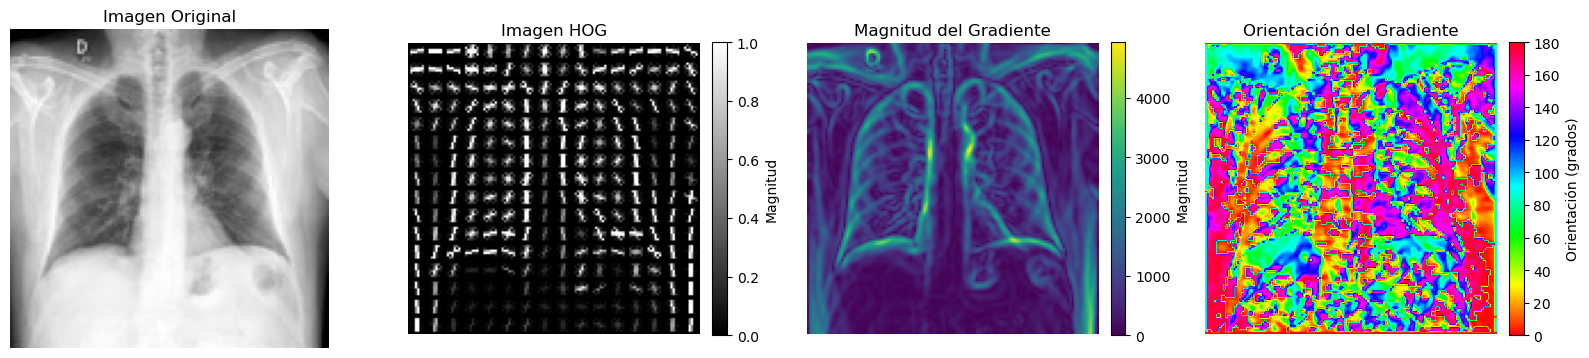

In [11]:
SIZE = 256

# Utilizaremos una imagen aleatoria de la categoría Covid
data_dir = os.getcwd()
covid_dir = os.path.join(data_dir, 'data', 'processed_data', 'Covid')
covid_images = os.listdir(covid_dir)
image_path = os.path.join(covid_dir, np.random.choice(covid_images))

# Imagen en escala de grises
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Función para calcular la orientación del gradiente en degrees
def gradient_orientation(grad_x, grad_y):
    return np.rad2deg(np.arctan2(grad_y, grad_x)) % 180

# Función para calcular la magnitud del gradiente
def magnitude(grad_x, grad_y):
    return np.sqrt(grad_x**2 + grad_y**2)

# Verificar si la imagen se cargó correctamente
if image is None:
    print("No se pudo cargar la imagen. Fijate que hiciste algo mal seguro.")
else:
    # Redimensionar la imagen a 128x128
    image_resized = cv2.resize(image, (128, 128))

    # Calculo de los gradientes
    grad_x = cv2.Sobel(image_resized, cv2.CV_64F, 1, 0, ksize=5)
    grad_y = cv2.Sobel(image_resized, cv2.CV_64F, 0, 1, ksize=5)

    # Calcular magnitud y orientación del gradiente
    magnitud = magnitude(grad_x, grad_y)
    orientacion = gradient_orientation(grad_x, grad_y)

    # Calcular HOG. Elegimos celdas de 8x8 y bloques de 2x2 y algunas configuraciones de normalización que recomiendan para su uso
    features, hog_image = hog(image_resized, orientations = 8, pixels_per_cell = (8, 8),
                              cells_per_block=(2, 2), visualize = True, block_norm = 'L2-Hys')

    # Otra normalización que se recomienda para visualización
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range = (0, 10))

    # Se muestram estas imagenes.
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    axes[0].imshow(image_resized, cmap='gray')
    axes[0].set_title('Imagen Original')
    axes[0].axis('off')

    im1 = axes[1].imshow(hog_image_rescaled, cmap='gray')
    axes[1].set_title('Imagen HOG')
    axes[1].axis('off')
    cbar1 = fig.colorbar(im1, ax=axes[1], orientation='vertical', fraction=0.046, pad=0.04)
    cbar1.set_label('Magnitud')

    im2 = axes[2].imshow(magnitud, cmap='viridis')
    axes[2].set_title('Magnitud del Gradiente')
    axes[2].axis('off')
    cbar2 = fig.colorbar(im2, ax=axes[2], orientation='vertical', fraction=0.046, pad=0.04)
    cbar2.set_label('Magnitud')

    im3 = axes[3].imshow(orientacion, cmap='hsv', vmin = 0, vmax = 180)
    axes[3].set_title('Orientación del Gradiente')
    axes[3].axis('off')
    cbar3 = fig.colorbar(im3, ax=axes[3], orientation='vertical', fraction=0.046, pad=0.04)
    cbar3.set_label('Orientación (grados)')

    plt.tight_layout()
    plt.show()

#### 3.a.3 Modelo de clafisicación con Support Vector Machine (SVM)

In [2]:
# Librarías para esta seccion
import os
import cv2
import numpy as np
from tqdm import tqdm
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

Definimos algunas funciones para cargar las imagenes y las características HOG

In [3]:
# Función para cargar imágenes y las etiquetas
def load_images_and_labels(data_dir, categories):
    images = []
    labels = []

    # Recorremos las categorias
    for category in categories:

        label = categories.index(category)                  # Indice de la categoría
        category_dir = os.path.join(data_dir, category)

        if os.path.exists(category_dir):
            # Recorremos todos los archivos del directorio, debemos checkear que sean imágenes.
            for filename in tqdm(os.listdir(category_dir)):
                if filename.endswith('.jpeg') or filename.endswith('.jpg') or filename.endswith('.png'):
                    img_path = os.path.join(category_dir, filename)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)    # Leemos la imagen en escala de grises
                    img = cv2.resize(img, (64, 64))                     # Redimensionamos para reducir el tiempo de cálculo
                    images.append(img)
                    labels.append(label)
        else:
            print(f"El directorio {category_dir} no existe. Se prosigue con el siguiente.")

    return images, labels


# Función para extraer el HOG de las imagenes.
def extract_hog_features(images):
    hog_features = []
    for image in tqdm(images):
        features, _ = hog(image, orientations = 8, pixels_per_cell = (8, 8), cells_per_block = (2, 2), visualize=True, block_norm = 'L2-Hys')
        hog_features.append(features)
    return np.array(hog_features)

Cargamos las imágenes

In [ ]:
# Directorios necesarios
jn_direct = os.getcwd()
data_dir = os.path.join(jn_direct, 'data', 'processed_data')

# Lista de categorías
categories = ['Covid', 'Normal', 'Pneumonia']

# Cargamos las imágenes y etiquetas.
images, labels = load_images_and_labels(data_dir, categories)

Cargamos las features HOG

In [ ]:
# Extraer características HOG
hog_features = extract_hog_features(images)

100%|██████████| 11972/11972 [03:59<00:00, 50.07it/s]


Dividimos la data en test y train y un clasificador SVM

In [36]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

# Entrenar un clasificador SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

####  3.a.4 Métricas de interés:

Se trata de una clasificación por clases, de modo que las métricas por clases se definen como sigue:

Accuracy (precisión) de la clase $A$:

$$Accuracy_A = \frac{TP_A}{TP_A+FP_A}$$

Recall de la clase $A$:

$$Recall_A = \frac{TP_A}{TP_A+FN_A}$$


F1-score de la clase $A$:

$$f1-score_A = \frac{1}{\frac{1}{Acc_A} + \frac{1}{Rec_A}}$$

Además, tenemos la accuracy global:

Macro-average:

$$Macro-avg = \frac{Acc_A + Acc_B + ... }{N}$$


Analicemos estas métricas en nuestro modelo

In [37]:
y_pred = svm_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte del resto de las métricas:\n", classification_report(y_test, y_pred, target_names=categories))

Accuracy: 0.9473903966597077
Reporte del resto de las métricas:
               precision    recall  f1-score   support

       Covid       0.96      0.97      0.96       467
      Normal       0.93      0.93      0.93       717
   Pneumonia       0.95      0.95      0.95      1211

    accuracy                           0.95      2395
   macro avg       0.95      0.95      0.95      2395
weighted avg       0.95      0.95      0.95      2395



Esto me parece altísimo. Como dijo Luis, too good to be true. Lo que si es cierto, es que se tarda mucho tiempo para cargar las imágenes. Además, podemos hacer un kfold-validation.

Extraemos imágenes de internet, que, en principio no estan incluidas en nuestro dataset. Las incluimos en el directorio `...\data\external_data\`

<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_720\4039321303.py:5: SyntaxWarning: invalid escape sequence '\e'
  data_dir = 'data\external_data'
100%|██████████| 1/1 [00:00<00:00, 55.57it/s]


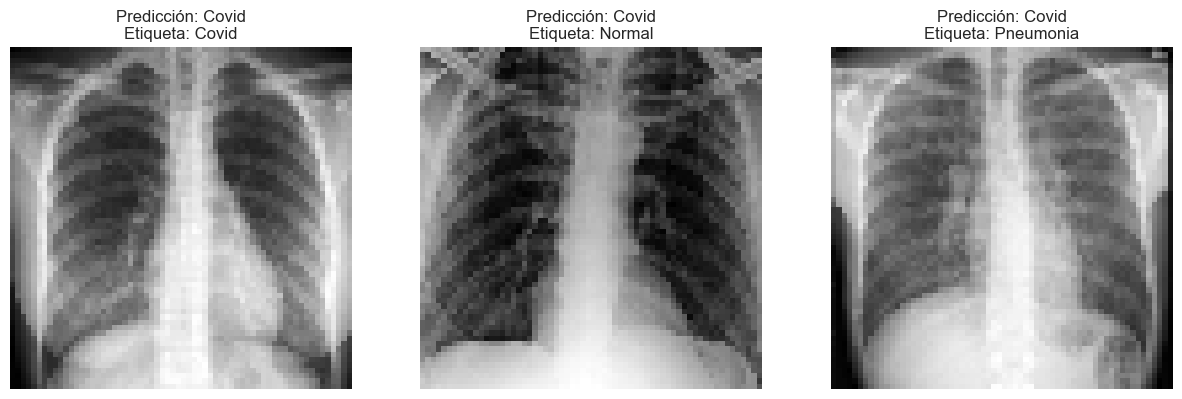

Valores de las funciones de decisión para la etiqueta Covid:
Covid: 2.22
Normal: -0.21
Pneumonia: 0.91

Valores de las funciones de decisión para la etiqueta Normal:
Covid: 2.3
Normal: -0.29
Pneumonia: 0.76

Valores de las funciones de decisión para la etiqueta Pneumonia:
Covid: 2.25
Normal: 1.14
Pneumonia: -0.26



In [38]:
# Cargar una imagen de prueba
img_names = ['covid_prueba.jpg','normal_prueba.jpg', 'pneumonia_prueba.jpg']
labels = ['Covid', 'Normal', 'Pneumonia']
data_dir = 'data\\external_data'

# Graficar las tres imagenes con su prediccion y etiqueta
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
#Valores de las funciones de decision
decision_values_array = []
for img_name, label, ax in zip(img_names, labels, axes):
    img_path = os.path.join(jn_direct, data_dir, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64))
    
    hog_features = extract_hog_features([img])

    predicted_label = svm_classifier.predict(hog_features)

    decision_values = svm_classifier.decision_function(hog_features)
    decision_values = np.round(decision_values, 2)
    decision_values_array.append(decision_values)

    ax.imshow(img, cmap='gray')
    ax.set_title(f"Predicción: {categories[predicted_label[0]]}\nEtiqueta: {label}")
    ax.axis('off')

plt.show()

# Imprimir los valores de las funciones de decisión
for label, decision_values in zip(labels, decision_values_array):
    print(f"Valores de las funciones de decisión para la etiqueta {label}:")
    for category, value in zip(categories, decision_values[0]):
        print(f"{category}: {value}")
    print()

Siempre se precide covid. Y las funciones de decisión indican que hay mucho margen con respecto a las demás. No comprendo entonces los valores de la accuracy obtenidos. ¿Quizás los datasets con los que contamos estan mezclados? Propongo hacer un entrenamiento utilizando sólo un dataset. Usaremos sólo los datos de Mendeley, debido a que este dataset cuenta con una cantidad de datos por categoría muy similar (ver tabla seccion 2.a.1)

#### 3.b Diferentes estrategias con SVM

##### 3.b.1 SVM utilizando sólo los datos del dataset2

Procesemos las imágenes del dataset2, hacia el directorio `...\data\proccesed_data_MEDELEY\`. Lo hacemos utilizando las mismas funciones que usamos antes. Para que cada sección sea autocontenida, las volvemos a definir

In [40]:
SIZE = 256
base_dir = os.getcwd()
data_dir = os.path.join(base_dir, 'data')
output_dir = os.path.join(data_dir, 'processed_data_MENDELEY')
target_size = (SIZE, SIZE)

categories = ['Covid', 'Normal', 'Pneumonia']
fases = ['train']

# Crear directorios de salida escritura de imagenes
for category in categories:
    os.makedirs(os.path.join(output_dir, category))

# Preprocesado de imagenes
def preprocess_and_save_images(source_dir, category, target_size):
    dest_path = os.path.join(output_dir, category)
    
    if not os.path.exists(source_dir):
        print(f"El directorio {source_dir} no existe. Pasando a otro directorio.")
        return
    
    for img_name in tqdm(os.listdir(source_dir)):

        try:                        # Elevamos una excepción por si hay un error
            img_dir = os.path.join(source_dir, img_name)
            img = Image.open(img_dir).convert('RGB')
            
            img = ImageOps.fit(img, target_size)
            
            img.save(os.path.join(dest_path, img_name))

        except Exception as e:
            print(f"Error procesando {img_dir}: {e}")

def process_dataset(dataset_dir, target_size):
    for category in tqdm(categories, desc=f"Procesando {dataset_dir}"):
        # Procesar imágenes de train si existen
        train_dir = os.path.join(dataset_dir, 'train', category)
        if os.path.exists(train_dir):
            preprocess_and_save_images(train_dir, category, target_size)
        else:
            print(f"El directorio {train_dir} no existe. Saltando.")

        # Procesar imágenes de test si existen
        test_dir = os.path.join(dataset_dir, 'test', category)
        if os.path.exists(test_dir):
            preprocess_and_save_images(test_dir, category, target_size)
        else:
            print(f"El directorio {test_dir} no existe. Saltando.")

# Procesar todos los datasets
for dataset in ['dataset2']:
    dataset_dir = os.path.join(data_dir, dataset)
    process_dataset(dataset_dir, target_size)

print("Preprocesamiento completo.")

100%|██████████| 1626/1626 [00:53<00:00, 30.46it/s]a\dataset2:   0%|          | 0/3 [00:00<?, ?it/s]
Procesando c:\machine_learning\MLF_FinalProject\data\dataset2:  33%|███▎      | 1/3 [00:53<01:47, 53.52s/it]

El directorio c:\machine_learning\MLF_FinalProject\data\dataset2\test\Covid no existe. Saltando.


100%|██████████| 1802/1802 [01:12<00:00, 24.84it/s]
Procesando c:\machine_learning\MLF_FinalProject\data\dataset2:  67%|██████▋   | 2/3 [02:06<01:04, 64.75s/it]

El directorio c:\machine_learning\MLF_FinalProject\data\dataset2\test\Normal no existe. Saltando.


100%|██████████| 1800/1800 [00:57<00:00, 31.06it/s]
Procesando c:\machine_learning\MLF_FinalProject\data\dataset2: 100%|██████████| 3/3 [03:04<00:00, 61.40s/it]

El directorio c:\machine_learning\MLF_FinalProject\data\dataset2\test\Pneumonia no existe. Saltando.
Preprocesamiento completo.


Cargamos las imagenes y las etiquetas

In [5]:
# Directorios
jn_direct = os.getcwd()
data_dir = os.path.join(jn_direct, 'data', 'processed_data_MENDELEY')
categories = ['Covid', 'Normal', 'Pneumonia']

# Cargar imágenes y etiquetas
images, labels = load_images_and_labels(data_dir, categories)

100%|██████████| 1800/1800 [00:16<00:00, 108.42it/s]


Cargamos las características HOG y entrenamos el modelo

In [42]:
# Extraer características HOG
hog_features = extract_hog_features(images)
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)
# Entrenar un clasificador SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Realizar predicciones
y_pred = svm_classifier.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte del resto de las métricas:\n", classification_report(y_test, y_pred, target_names=categories))

100%|██████████| 5228/5228 [01:42<00:00, 51.24it/s]


Accuracy: 0.9512428298279159
Reporte del resto de las métricas:
               precision    recall  f1-score   support

       Covid       0.96      0.99      0.97       351
      Normal       0.93      0.94      0.94       330
   Pneumonia       0.95      0.93      0.94       365

    accuracy                           0.95      1046
   macro avg       0.95      0.95      0.95      1046
weighted avg       0.95      0.95      0.95      1046



Las métricas son similares al modelo cuando utilizabamos todos los datasets. De nuevo, too good to be true. Puede que estemos sobredimensionando el SVM, puedo a que la dimension de las features que nos devuelve el HOG es altísima.

Probemos hacer predicciones con imagenes de prueba de los otros datasets que no fueron utilizados para el entrenamiento de este nuevo modelo, aleatoriamente.

Imagenes de prueba:
Imagen: NORMAL(1340).jpg, Etiqueta: Normal
Imagen: PNEUMONIA(1375).jpg, Etiqueta: Pneumonia
Imagen: 065.jpeg, Etiqueta: Normal


100%|██████████| 1/1 [00:00<00:00, 79.34it/s]


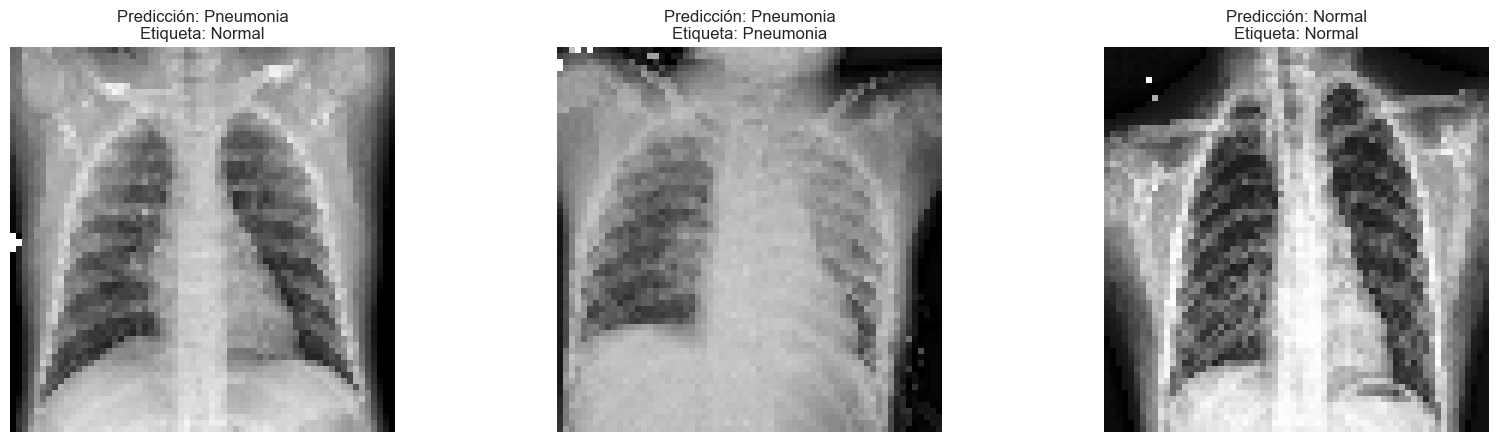

Valores de las funciones de decisión para la etiqueta Normal:
Covid: -0.24
Normal: 1.17
Pneumonia: 2.21

Valores de las funciones de decisión para la etiqueta Pneumonia:
Covid: -0.24
Normal: 0.82
Pneumonia: 2.26

Valores de las funciones de decisión para la etiqueta Normal:
Covid: -0.2
Normal: 2.23
Pneumonia: 0.88



In [65]:
jn_direct = os.getcwd()
datasets = ['dataset1', 'dataset3']
data_dir = os.path.join(jn_direct, 'data')
categories = ['Covid', 'Normal', 'Pneumonia']
fases = ['train', 'test']

num_images = 3
img_names = []
img_labels = []
img_dir = []
for i in range (num_images):
    # Elegimos aleatoriamente el direcotrio de la imagen
    dataset = np.random.choice(datasets)
    fase = np.random.choice(fases)
    category = np.random.choice(categories)
    category_dir = os.path.join(data_dir, dataset, fase, category)
    img_name = np.random.choice(os.listdir(category_dir))
    img_names.append(img_name)
    img_dir.append(os.path.join(data_dir, dataset, fase, category))
    img_labels.append(category)

print("Imagenes de prueba:")
for img_name, label in zip(img_names, img_labels):
    print(f"Imagen: {img_name}, Etiqueta: {label}")
print()

# Graficar las tres imagenes con su prediccion y etiqueta
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
decision_values_array = []
for img_name, label, ax, i in zip(img_names, img_labels, axes, range(num_images)):
    img_path = os.path.join(img_dir[i],  img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    # Si pudo leer la imagen
    if img is None:
        print("No se pudo cargar la imagen. Verifica la ruta y asegúrate de que la imagen existe.")
    else:
        img = cv2.resize(img, (64, 64))
        
        hog_features = extract_hog_features([img])

        predicted_label = svm_classifier.predict(hog_features)

        decision_values = svm_classifier.decision_function(hog_features)
        decision_values = np.round(decision_values, 2)
        decision_values_array.append(decision_values)

        ax.imshow(img, cmap='gray')
        ax.set_title(f"Predicción: {categories[predicted_label[0]]}\nEtiqueta: {label}")
        ax.axis('off')

plt.show()

# Imprimir los valores de las funciones de decisión
for label, decision_values in zip(img_labels, decision_values_array):
    print(f"Valores de las funciones de decisión para la etiqueta {label}:")
    for category, value in zip(categories, decision_values[0]):
        print(f"{category}: {value}")
    print()

Despues de correr la celda de arriba muchas veces con los datasets, encuentro muy pocos errores en la prediccion. Sospecho que hay algo raro en los datos. Lo que leí, es que los distintos datasets con los que cuento a veces son sacados de las mismas fuentes, entonces puede haber datos repetidos. De todas maneras, lo encuentro intrigante y un poco sorprendente. Se puede intentar probar con HOG+PCA y ver si eso cambia las cosas, dado que las dimensiones de las featires HOG son altísimas

#### 3.b.2 SVM utilizando HOG+PCA.

Pasamos las features por una reduccion de dimensionalidad quedandonos con las principales componentes. Haremos pruebas aumentando las componentes del PCA. Seguimos utilizando sólo los datos del dataset2

In [1]:
from sklearn.decomposition import PCA

In [4]:
# Directorio del jupiter notebook
jn_direct = os.getcwd()
data_dir = os.path.join(jn_direct, 'data', 'processed_data_MENDELEY')

# Lista de categorías
categories = ['Covid', 'Normal', 'Pneumonia']

# Cargar imágenes y etiquetas
images, labels = load_images_and_labels(data_dir, categories)

100%|██████████| 1800/1800 [00:05<00:00, 356.73it/s]


In [5]:
# Extraer características HOG
hog_features = extract_hog_features(images)
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

100%|██████████| 5228/5228 [01:23<00:00, 62.46it/s]


N_components = 10

In [6]:
pca = PCA(n_components = 10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenar un clasificador SVM con los datos reducidos por PCA
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_pca, y_train)


# Realizar predicciones y evaluar el modelo
y_pred = svm_classifier.predict(X_test_pca)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte del resto de las métricas:\n", classification_report(y_test, y_pred, target_names=categories))

Accuracy: 0.9110898661567878
Reporte del resto de las métricas:
               precision    recall  f1-score   support

       Covid       0.95      0.95      0.95       351
      Normal       0.85      0.93      0.89       330
   Pneumonia       0.94      0.86      0.90       365

    accuracy                           0.91      1046
   macro avg       0.91      0.91      0.91      1046
weighted avg       0.91      0.91      0.91      1046



N_components = 20

In [11]:
pca = PCA(n_components = 20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [13]:
# Entrenar un clasificador SVM con los datos reducidos por PCA
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_pca, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = svm_classifier.predict(X_test_pca)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte del resto de las métricas:\n", classification_report(y_test, y_pred, target_names=categories))

Accuracy: 0.9282982791586998
Reporte del resto de las métricas:
               precision    recall  f1-score   support

       Covid       0.95      0.96      0.96       351
      Normal       0.88      0.94      0.91       330
   Pneumonia       0.95      0.88      0.92       365

    accuracy                           0.93      1046
   macro avg       0.93      0.93      0.93      1046
weighted avg       0.93      0.93      0.93      1046



N_components = 50

In [15]:
pca = PCA(n_components = 50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenar un clasificador SVM con los datos reducidos por PCA
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_pca, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = svm_classifier.predict(X_test_pca)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte del resto de las métricas:\n", classification_report(y_test, y_pred, target_names=categories))

Accuracy: 0.9426386233269598
Reporte del resto de las métricas:
               precision    recall  f1-score   support

       Covid       0.96      0.97      0.97       351
      Normal       0.91      0.95      0.93       330
   Pneumonia       0.96      0.90      0.93       365

    accuracy                           0.94      1046
   macro avg       0.94      0.94      0.94      1046
weighted avg       0.94      0.94      0.94      1046



N_components = 100

In [17]:
pca = PCA(n_components = 100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenar un clasificador SVM con los datos reducidos por PCA
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_pca, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = svm_classifier.predict(X_test_pca)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte del resto de las métricas:\n", classification_report(y_test, y_pred, target_names=categories))

Accuracy: 0.9502868068833652
Reporte del resto de las métricas:
               precision    recall  f1-score   support

       Covid       0.96      0.99      0.97       351
      Normal       0.92      0.95      0.94       330
   Pneumonia       0.97      0.91      0.94       365

    accuracy                           0.95      1046
   macro avg       0.95      0.95      0.95      1046
weighted avg       0.95      0.95      0.95      1046



Hemos probado con diferentes valores de componentes para el PCA:


<div align="center">
        
| PCA Components  | Accuracy | Covid Precision | Covid Recall |
|----------|-------|--------|----------|
| NO PCA |0.95|0.96|0.99|
| 100 |0.95|0.96|0.99|
| 50 |0.94|0.96|0.97|
| 20 |0.93|0.95|0.96|
| 10 |0.91|0.95|0.95|

</div>

Vemos como al aumentar las componentes consideradas del PCA, las métricas van aumentando.

#### 3.b.3 CVM con HOD+PCA con K-fold validation

In [12]:
# TODO

### 3.c Entrenamiento con redes neuronales profundas: CNN

#### Pequeña descripción de las ConvsNets:

Se trata de un tipo de red neuronal para procedar tipo de datos cuadiculados, como imágenes. Son una clase de deep learning poderosa para captar características especiales y patrones en imágenes. Aplican filtros a la imagen y detectan carectirísticas locales como bordes, texturas y formas. Poseen invariancia ante traslación, rotacion y estiramiento, lo cual es una ventaja puesto que eso puede variar de imagen a imagen. Esto es una ventaja porque se puede hacer un aumento de imagenes.

Vamos a utiizar los datos preprocesados del dataset2, es decir lo que estan en el directorio `...\data\processed_data_MENDELEY\`. Como para generar los datos de train y test vamos a utilizar tensorflow.keras que toma datos desde el directorio, vamos a dividir estos datos en carpetas de `train`, `validaition` y `test`con una proporcion de 70%, 15% y 15% respectivamente. 

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [75]:
# Directorios de origen y destino
jn_dir = os.getcwd()
data_dir = os.path.join(jn_dir, 'data')
data_processed_dir = os.path.join(data_dir, 'processed_data_MENDELEY')
output_dir = 'data_CNN'
train_dir = os.path.join(data_dir, output_dir, 'train')
val_dir = os.path.join(data_dir, output_dir, 'val')
test_dir = os.path.join(data_dir, output_dir, 'test')

# Creamos los directorios de test, val y train
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Crear subdirectorios para cada clase en los directorios de destino
categories = ['Covid', 'Normal', 'Pneumonia']
for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Función para dividir y copiar imágenes
def split_data(category, train_size = 0.7, val_size = 0.15, test_size = 0.15):
    class_dir = os.path.join(data_processed_dir, category)
    images = os.listdir(class_dir)
    
    # Dividir en entrenamiento y prueba
    # Primero dividimos en (train + val) y test
    train_and_val, test = train_test_split(images, test_size = test_size, random_state = 42)
    # Luego dividimos en train y val
    train, val = train_test_split(train_and_val, test_size = val_size / (train_size + val_size), random_state = 42)
    
    # Copiar archivos
    for img in train:
        shutil.copy(os.path.join(class_dir, img), os.path.join(train_dir, category, img))
    for img in val:
        shutil.copy(os.path.join(class_dir, img), os.path.join(val_dir, category, img))
    for img in test:
        shutil.copy(os.path.join(class_dir, img), os.path.join(test_dir, category, img))

# Dividir los datos para cada clase
for category in categories:
    split_data(category)

#### 3.c.1 Aumentacion de imagenes

El módulo ImageDataGenerator posee unas características para un preprocesado y aumentacion de las imagenes (aument).

- rescale = 1./255: lleva todos los pixeles de la imagen a valores entre 0 y 1
- shear_range: transformacion de corte a las imágenes para distorcionarla de manera horizontal o vertical, así el modelo es robusto frante a variaciones en las imágenes.
- zoom_range: aplica un zoom aleatorio en la imagen
- horizontal_flip: hace un volteo aleatorio de las imágenes

In [2]:
# Parámetros para las imagenes y el entrenamiento
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 25

In [3]:
# Directorios de destino
jn_dir = os.getcwd()
data_dir = os.path.join(jn_dir, 'data')
output_dir = os.path.join(data_dir, 'data_CNN')

# Generador de datos con aumentación para entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Generador de datos para validación (solo normalización)
val_datagen = ImageDataGenerator(rescale=1./255)

# Generador de datos para prueba (solo normalización)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generador para el conjunto de entrenamiento
train_generator = train_datagen.flow_from_directory(
    os.path.join(output_dir, 'train'),
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

# Generador para el conjunto de val
validation_generator = val_datagen.flow_from_directory(
    os.path.join(output_dir, 'val'),
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

# Generador para el conjunto de test
test_generator = test_datagen.flow_from_directory(
    os.path.join(output_dir, 'test'),
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 3658 images belonging to 3 classes.
Found 785 images belonging to 3 classes.
Found 785 images belonging to 3 classes.


#### 3.c.2 Definición de la red

Ahora sí, vamos a los bifes, a hacer una red CNN para darle de comer con estas imagenes

Para ello, la arquitectura elegida posee tres capas convolucionales, con un Pooling tipo valor Máximo entre capas, y luego una capa densa antes de llegan a la capa de salida de 3 neuronas de nuestras categorías. Se utiliza como funcion de loss la categorical cross entropy, y funciones de activación relu, excepto la softmax de la última capa.

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import save_model

In [81]:
# Definición del modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(3, activation = 'softmax')
])

# Compilación del modelo
model.compile(optimizer = Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Resumen del modelo
model.summary()

c:\Users\Usuario\miniconda3\envs\machine_learning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,363 (56.61 MB)

 Trainable params: 14,839,363 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

#### 3.c.3 Entrenamiento del modelo

In [82]:
steps_per_epoch = train_generator.samples // train_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS
)

Epoch 1/25


c:\Users\Usuario\miniconda3\envs\machine_learning\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


114/114 ━━━━━━━━━━━━━━━━━━━━ 386s 3s/step - accuracy: 0.6237 - loss: 0.9829 - val_accuracy: 0.8125 - val_loss: 0.3914
Epoch 2/25
  1/114 ━━━━━━━━━━━━━━━━━━━━ 4:37 2s/step - accuracy: 0.8125 - loss: 0.4457

c:\Users\Usuario\miniconda3\envs\machine_learning\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8125 - loss: 0.4457 - val_accuracy: 0.8235 - val_loss: 0.4269
Epoch 3/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 330s 3s/step - accuracy: 0.8327 - loss: 0.4321 - val_accuracy: 0.9167 - val_loss: 0.2399
Epoch 4/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8125 - loss: 0.4462 - val_accuracy: 0.9412 - val_loss: 0.2317
Epoch 5/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - accuracy: 0.8707 - loss: 0.3438 - val_accuracy: 0.9271 - val_loss: 0.2164
Epoch 6/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8750 - loss: 0.3559 - val_accuracy: 1.0000 - val_loss: 0.1378
Epoch 7/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 310s 3s/step - accuracy: 0.8853 - loss: 0.3231 - val_accuracy: 0.9323 - val_loss: 0.1950
Epoch 8/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9688 - loss: 0.1384 - val_accuracy: 0.8824 - val_loss: 0.2464
Epoch 9/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 340s 3s/step - accuracy: 0.8889 - loss: 0.2964 - val_accuracy: 0.9453 - 

Algo raro sucede que no entiendo: algunas épocas pasan muy rápidamente. No comprendo bien por qué. Una posible causa puede ser que no se cuente con la suficiente cantidad de datos para cubrir `steps_per_epoch` * `epochs` batches.

Guardamos los datos del modelo entrenado para no tener que volver a entrenarlo.

In [84]:
jn_dir = os.getcwd()
model_dir = os.path.join(jn_dir, 'model')
model_name = 'model1_CNN.keras'
save_model(model, os.path.join(model_dir, model_name))

#### 3.c.4 Evaluación del entrenamiento

Vamos a evualiar las métricas del modelo luego del entrenamiento

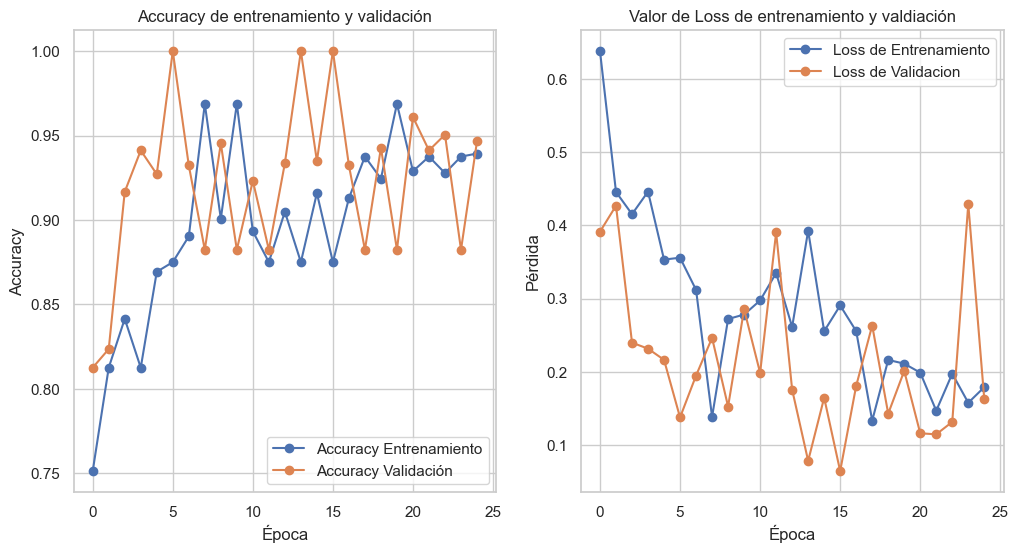

In [89]:
# Metricas del entrenamiento
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], '-o', label='Accuracy Entrenamiento')
plt.plot(history.history['val_accuracy'], '-o', label='Accuracy Validación')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.title('Accuracy de entrenamiento y validación')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], "-o", label='Loss de Entrenamiento')
plt.plot(history.history['val_loss'], '-o', label='Loss de Validacion')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Valor de Loss de entrenamiento y valdiación')
plt.legend()

plt.show()

Se observa que luego de 10 épocas, el modelo llega a valores estacioarios tanto de accuracy y de pérdida.

#### 3.c.5 Evaluación de los datos de test

Evaluacion de la accuracy de los datos de testeo con el modelo

In [97]:
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Pérdida en el conjunto de test: {test_loss:.4f}")
print(f"Accuracy en el conjunto de test: {test_accuracy:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 404ms/step - accuracy: 0.9719 - loss: 0.0997
Pérdida en el conjunto de test: 0.1284
Accuracy en el conjunto de test: 0.9592


Los valores de accuracy son razonables, comparados a los que se reportan en los papers de referencia.

#### 3.c.6 CNN con otras arquitecturas

Entrenemos una red que posea métricas de recall y de presicion para la categoría covid y juguemos un poco con la arquitectura de la red. Agregamos una campa convolucional a ver si aprende cosas mas "produnfas" en las imágenes, agregamos un regularizador L2 a la capa densa.

In [114]:
from tensorflow.keras.metrics import Precision, Recall
from keras.regularizers import l2

#Cambiamos el tamaño de los filtros haciendolos más pequeños y agregamos una capa convulocional más y agregamos un reguñaizador l2 a la capa densa
model2 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),     
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),  
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu',  kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compilación del modelo
model2.compile(optimizer = Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy', Precision(), Recall()])

# Resumen del modelo
model2.summary()

c:\Users\Usuario\miniconda3\envs\machine_learning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,309,219 (12.62 MB)

 Trainable params: 3,309,219 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

In [115]:
EPOCHS = 10

history2 = model2.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS
)

Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.5289 - loss: 1.6160 - precision_8: 0.6096 - recall_8: 0.2793 - val_accuracy: 0.7865 - val_loss: 0.6541 - val_precision_8: 0.7909 - val_recall_8: 0.7734
Epoch 2/10
  1/114 ━━━━━━━━━━━━━━━━━━━━ 2:16 1s/step - accuracy: 0.6562 - loss: 1.1248 - precision_8: 0.6452 - recall_8: 0.6250

c:\Users\Usuario\miniconda3\envs\machine_learning\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6562 - loss: 1.1248 - precision_8: 0.6452 - recall_8: 0.6250 - val_accuracy: 0.8824 - val_loss: 0.6089 - val_precision_8: 0.8824 - val_recall_8: 0.8824
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.7889 - loss: 0.7016 - precision_8: 0.8165 - recall_8: 0.7443 - val_accuracy: 0.8945 - val_loss: 0.4348 - val_precision_8: 0.9021 - val_recall_8: 0.8880
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7500 - loss: 0.6464 - precision_8: 0.7742 - recall_8: 0.7500 - val_accuracy: 0.9412 - val_loss: 0.3357 - val_precision_8: 1.0000 - val_recall_8: 0.9412
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 300s 3s/step - accuracy: 0.8372 - loss: 0.5765 - precision_8: 0.8583 - recall_8: 0.8139 - val_accuracy: 0.8815 - val_loss: 0.4532 - val_precision_8: 0.8919 - val_recall_8: 0.8698
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7812 - loss: 0.7010 - precision_8: 0.7812 - recall_8: 0.7812 - val_accu

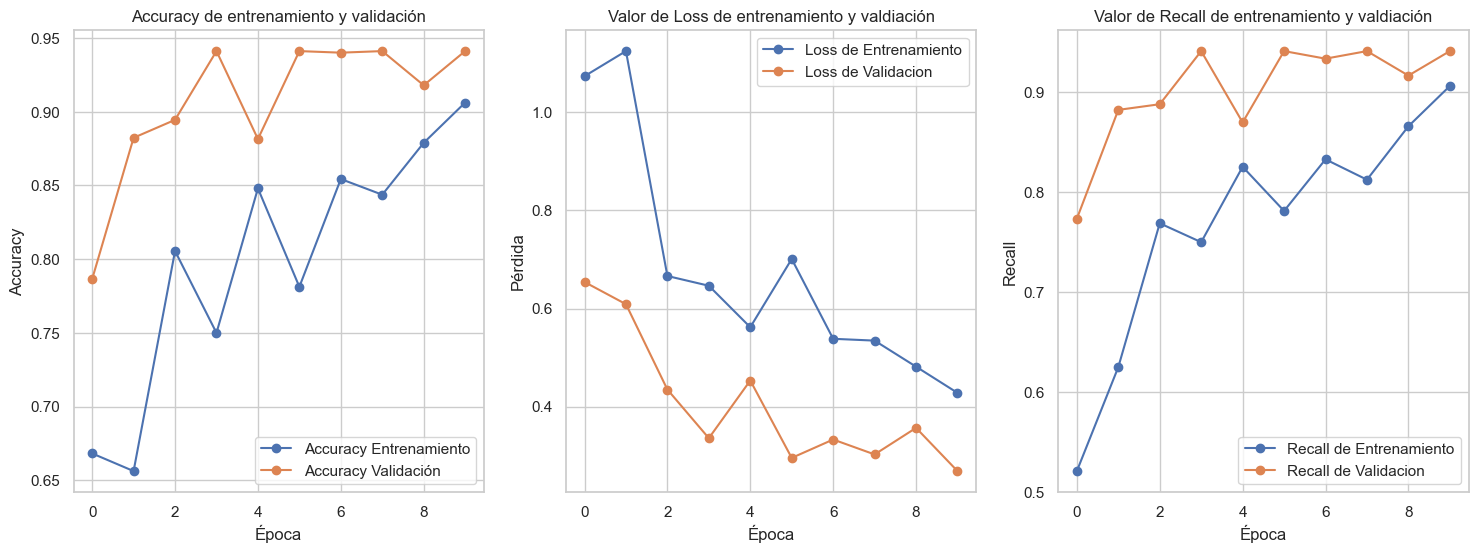

In [122]:
# Metricas del entrenamiento
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(history2.history['accuracy'], '-o', label='Accuracy Entrenamiento')
plt.plot(history2.history['val_accuracy'], '-o', label='Accuracy Validación')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.title('Accuracy de entrenamiento y validación')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history2.history['loss'], "-o", label='Loss de Entrenamiento')
plt.plot(history2.history['val_loss'], '-o', label='Loss de Validacion')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Valor de Loss de entrenamiento y valdiación')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history2.history['recall_8'], "-o", label='Recall de Entrenamiento')
plt.plot(history2.history['val_recall_8'], '-o', label='Recall de Validacion')
plt.xlabel('Época')
plt.ylabel('Recall')
plt.title('Valor de Recall de entrenamiento y valdiación')
plt.legend()

plt.show()

In [123]:
# Metricas de accuracy y recall

test_loss, test_accuracy, test_recall = model2.evaluate(test_generator)

print(f"Pérdida en el conjunto de test: {test_loss:.4f}")
print(f"Accuracy en el conjunto de test: {test_accuracy:.4f}")
print(f"Recall en el conjunto de test: {test_recall:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 242ms/step - accuracy: 0.9120 - loss: 0.3592 - precision_8: 0.9124 - recall_8: 0.9055
Pérdida en el conjunto de test: 0.3601
Accuracy en el conjunto de test: 0.9146
Recall en el conjunto de test: 0.9083


La accuracy bajó un poco para esta arquitectura con respecto a la anterior.

Guardamos el modelo

In [125]:
from tensorflow.keras.models import save_model

jn_dir = os.getcwd()
model_dir = os.path.join(jn_dir, 'model')
model_name = 'model2_CNN.keras'
save_model(model2, os.path.join(model_dir, model_name))

#### 3.c.7 Predicciones de datos externos al dataset utilizado

Probemos nuevamente con imágenes sacadas de otro dataset que no fueron utilizadas ni para el entrenamiento ni validación ni testeo, elegidas aleatoriamente entre los otros sets de datos

Para el modelo 1

Imágenes de prueba:
Imagen: COVID19(406).jpg, Etiqueta: Covid
Imagen: COVID19(563).jpg, Etiqueta: Covid
Imagen: 058.jpeg, Etiqueta: Pneumonia

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


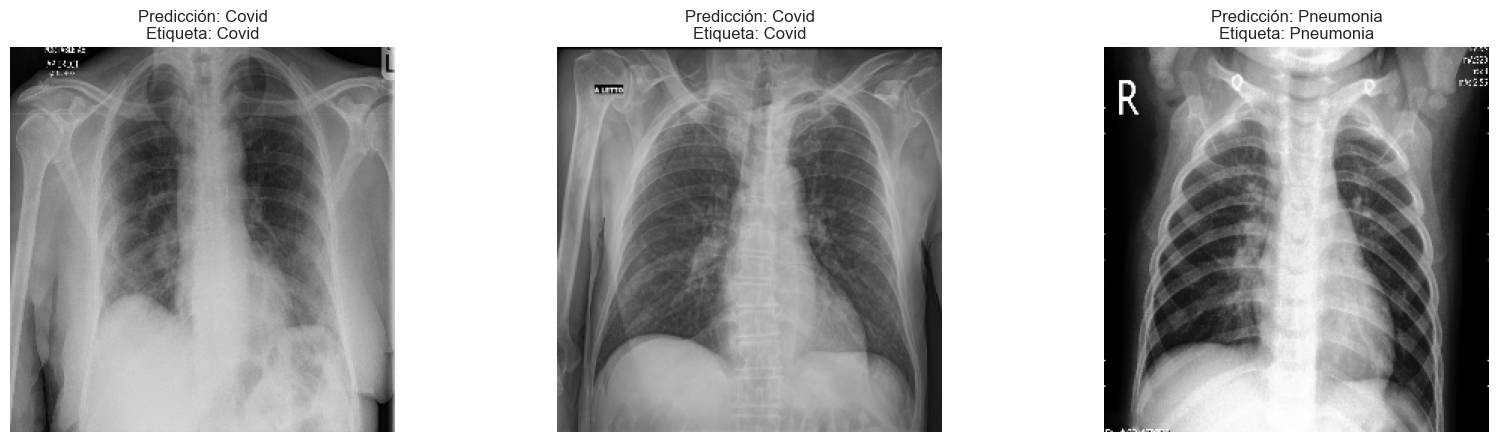

Valores de las funciones de accuracy para la etiqueta Covid:
Covid: 1.0
Normal: 0.0
Pneumonia: 0.0

Valores de las funciones de accuracy para la etiqueta Covid:
Covid: 0.8700000047683716
Normal: 0.10000000149011612
Pneumonia: 0.029999999329447746

Valores de las funciones de accuracy para la etiqueta Pneumonia:
Covid: 0.0
Normal: 0.029999999329447746
Pneumonia: 0.9700000286102295



In [133]:
# Vamos a tomar imágenes aleatorias y vamos a introducirlas  en el modelo de la CNN para ver si las clasifica correctamente

# Cargar una imagen de prueba
jn_direct = os.getcwd()
datasets = ['dataset1', 'dataset3']
data_dir = os.path.join(jn_direct, 'data')
categories = ['Covid', 'Normal', 'Pneumonia']
fases = ['train', 'test']

# Cargar una imagen de prueba
num_images = 3
img_names = []
img_labels = []
img_dir = []
for i in range(num_images):
    # Elegimos aleatoriamente el directorio de la imagen
    dataset = np.random.choice(datasets)
    fase = np.random.choice(fases)
    category = np.random.choice(categories)
    category_dir = os.path.join(data_dir, dataset, fase, category)
    img_name = np.random.choice(os.listdir(category_dir))
    img_names.append(img_name)
    img_dir.append(os.path.join(data_dir, dataset, fase, category))
    img_labels.append(category)

print("Imágenes de prueba:")
for img_name, label in zip(img_names, img_labels):
    print(f"Imagen: {img_name}, Etiqueta: {label}")
print()

# Graficar las tres imágenes con su predicción y etiqueta
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
decision_values_array = []
for img_name, label, ax, i in zip(img_names, img_labels, axes, range(num_images)):
    img_path = os.path.join(img_dir[i], img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    # Si pudo leer la imagen
    if img is None:
        print("No se pudo cargar la imagen. Verifica la ruta y asegúrate de que la imagen existe.")
    else:
        # Convertir a RGB si es necesario
        if len(img.shape) == 2 or img.shape[2] == 1:  # Si es escala de grises
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        img_resized = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
        img_normalized = np.expand_dims(img_resized, axis=0) / 255.0  # Normalizar

        # Realizar predicciones
        predicted_label = model.predict(img_normalized)
        predicted_label = np.argmax(predicted_label, axis=1)

        # Guardar los valores de las funciones de decisión
        decision_values = model.predict(img_normalized)
        decision_values = np.round(decision_values, 2)
        decision_values_array.append(decision_values)

        ax.imshow(img_resized)
        ax.set_title(f"Predicción: {categories[predicted_label[0]]}\nEtiqueta: {label}")
        ax.axis('off')

plt.show()

# Imprimir los valores de las funciones de decisión
for label, decision_values in zip(img_labels, decision_values_array):
    print(f"Valores de las funciones de accuracy para la etiqueta {label}:")
    for category, value in zip(categories, decision_values[0]):
        print(f"{category}: {value}")
    print()

Predice correctamente los tres casos.

Para el modelo 2

Imágenes de prueba:
Imagen: 024.jpeg, Etiqueta: Normal
Imagen: 012.jpeg, Etiqueta: Normal
Imagen: COVID19(458).jpg, Etiqueta: Covid

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


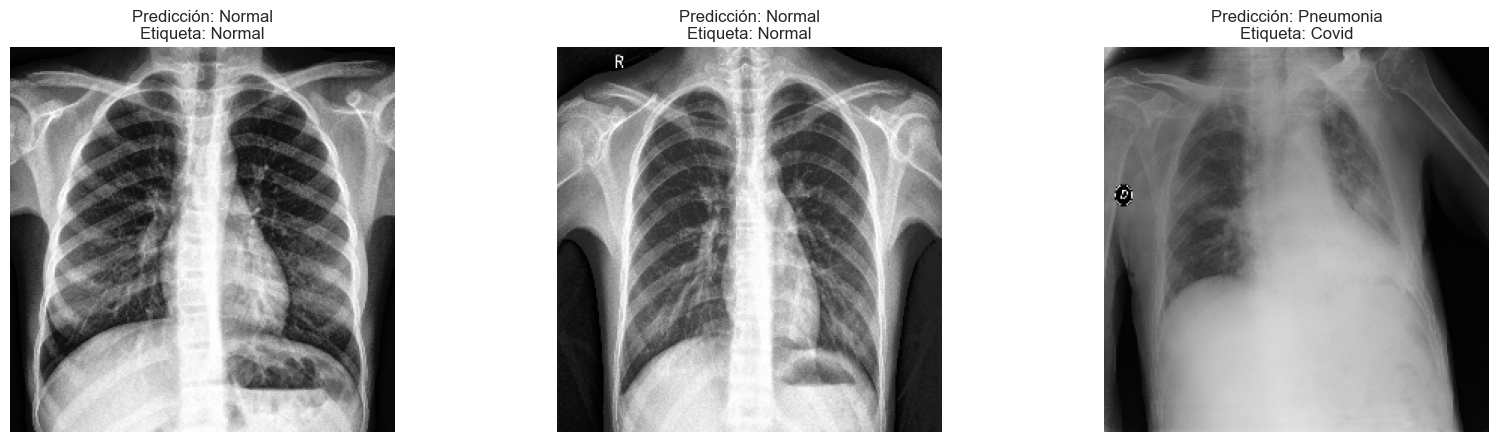

Valores de las funciones de accuracy para la etiqueta Normal:
Covid: 0.0
Normal: 0.9800000190734863
Pneumonia: 0.019999999552965164

Valores de las funciones de accuracy para la etiqueta Normal:
Covid: 0.009999999776482582
Normal: 0.9599999785423279
Pneumonia: 0.029999999329447746

Valores de las funciones de accuracy para la etiqueta Covid:
Covid: 0.07999999821186066
Normal: 0.009999999776482582
Pneumonia: 0.9200000166893005



In [134]:
# Cargar una imagen de prueba
jn_direct = os.getcwd()
datasets = ['dataset1', 'dataset3']
data_dir = os.path.join(jn_direct, 'data')
categories = ['Covid', 'Normal', 'Pneumonia']
fases = ['train', 'test']

# Cargar una imagen de prueba
num_images = 3
img_names = []
img_labels = []
img_dir = []
for i in range(num_images):
    # Elegimos aleatoriamente el directorio de la imagen
    dataset = np.random.choice(datasets)
    fase = np.random.choice(fases)
    category = np.random.choice(categories)
    category_dir = os.path.join(data_dir, dataset, fase, category)
    img_name = np.random.choice(os.listdir(category_dir))
    img_names.append(img_name)
    img_dir.append(os.path.join(data_dir, dataset, fase, category))
    img_labels.append(category)

print("Imágenes de prueba:")
for img_name, label in zip(img_names, img_labels):
    print(f"Imagen: {img_name}, Etiqueta: {label}")
print()

# Graficar las tres imágenes con su predicción y etiqueta
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
decision_values_array = []
for img_name, label, ax, i in zip(img_names, img_labels, axes, range(num_images)):
    img_path = os.path.join(img_dir[i], img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    # Si pudo leer la imagen
    if img is None:
        print("No se pudo cargar la imagen. Verifica la ruta y asegúrate de que la imagen existe.")
    else:
        # Convertir a RGB si es necesario
        if len(img.shape) == 2 or img.shape[2] == 1:  # Si es escala de grises
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        img_resized = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
        img_normalized = np.expand_dims(img_resized, axis=0) / 255.0  # Normalizar

        # Realizar predicciones
        predicted_label = model2.predict(img_normalized)
        predicted_label = np.argmax(predicted_label, axis=1)

        # Guardar los valores de las funciones de decisión
        decision_values = model2.predict(img_normalized)
        decision_values = np.round(decision_values, 2)
        decision_values_array.append(decision_values)

        ax.imshow(img_resized)
        ax.set_title(f"Predicción: {categories[predicted_label[0]]}\nEtiqueta: {label}")
        ax.axis('off')

plt.show()

# Imprimir los valores de las funciones de decisión
for label, decision_values in zip(img_labels, decision_values_array):
    print(f"Valores de las funciones de accuracy para la etiqueta {label}:")
    for category, value in zip(categories, decision_values[0]):
        print(f"{category}: {value}")
    print()

Predijo Pneumonia en lugar de COVID en la tercera imagen.

## 4. Resumen y Conslusiones



Para el problema de clasificación de imágenes de rayos X de tres categorías, Normal, neumonía con Covid y neumonía por otro virus, con el objetivo de determinar si una persona posee o no por neumonía y si esta es causada por COVID, se implementaron diferentes técnicas de modelados para el aprendizaje. y entrenamiento de los datos.

Inicialmente se hace un preprocesado de los imágenes, puesto a que poseen diferentes tamaños y relaciones de aspecto. Inicialmente se consideraron tres datasets diferentes, pero luego de entrenar el primer modelo, se optó por utilizar sólo uno de ellos, pues las proporciones de las imágenes de las tres categorías es similar.

- Se entrenó un modelo de clasifiación utilizando Support Vector Machine, generando con las imágenes features a partir de las características de las orientaciones de las imágenes HOG. Al analizar las métricas, se han encontrado valores de accuracy superiores a 0.9, obteniendo valores similares para los datos de testeo, un valor mucho mayor al reportado en los papers. Se presumió que el modelo estaba sobredimensionado, es decir tener errores de variance. Se realizó reducción de dimensionalidad del modelo utilizando PCA para asó quedarnos con las componentes principales de las características HOG de las imágenes. Se observó que incluso para un número de componentes igual a 10, se obtienen accuracies superiores a 0.9. Valores que no esperaba que sean tan altos. Al introducir imágenes de los otros datasets no utilizados al modelo, vemos que el modelo predice satisfactoriamente en la mayoría de los casos, lo cual me parece realmente sorprendente. 

- Por otro lado, se han utilizado modelos de aprendizaje profundo para dicha clasificación. Utilizando los datos del dataset de MENDELEY, se han entrenado dos diferentes arquitecturas de redes convolucionales. Este tipo de método de aprendizaje es presuntamente mejor para la clasifiación de imágenes puesto a que se pueden capturar patrones más profundos, y no es sensible a cambios de traslación, rotación y escala. Se han encontrado en ambos casos valores de accuracies en los datos de testeo superiores a 0.9, lo cual es similar a lo reportado en los papers que utilizan estos datos, con metodos de aprendizajes similares.